## Programming of Data Analysis Project 1

**Francesco Troja**

***

Project 1

>Create a data set by simulating a real-world phenomenon of your choosing. Then rather than collect data related to the phenomenon, you should model and synthesise such data using Python.We suggest you use the numpy.random package for this purpose. Specifically, in this project you should:
>- Choose a real-world phenomenon that can be measured and for which you could collect at least one-hundred data points across at least four different variables.
>- Investigate the types of variables involved, their likely distributions, and their relationships with each other.
>- Synthesise/simulate a data set as closely matching their properties as possible.
>- Detail your research and implement the simulation in a Jupyter notebook – the data set itself can simply be displayed in an output cell within the notebook.


#### Introduction

This dataset is structured to facilitate the prediction of house prices using a machine learning model. Each row represents a unique property, and the columns provide information about different aspects of the property. The primary goal is to build a predictive model that can estimate the price of a house based on its characteristics. Through data exploration and machine learning techniques, the goal is to identify which features are most crucial in determining the price of a property. Understanding these relationships can provide insights into the real estate market and guide stakeholders in making informed decisions.

#### Installations

To execute this project, several Python libraries have been utilized. These libraries were chosen for their specific functionalities and capabilities, tailored to the requirements of the project:
1. `padas`: The library's powerful data structures, including DataFrames and Series, allowed for efficient organization and structuring of data, making it easy to perform various data operations, such as filtering, grouping, and aggregating.Pandas offered a wide range of functions for data cleaning and preparation, making it ideal for addressing real-world data challenges[1].
2. `matplotlib.pyplot`: It is a widely used library for data visualization in Python. It provides a flexible and comprehensive set of tools to create various types of plots and charts. Its versatility allows to create bar charts, line plots, scatter plots, histograms, and more, making it an essential tool for exploratory data analysis and presentation of findings[2].
3. `numpy`: It is imported in this context for its extensive capabilities in numerical and statistical operations. Numpy provides a wide range of probability distributions, functions for generating random numbers following these distributions, and tools for statistical calculations[3].
4. `scipy.stats`: It includes an extensive array of statistical functionalities, covering various aspects of probability and data analysis. It includes a diverse set of probability distributions, facilitating the modeling of different random variables. Moreover, the module provides tools for generating summary and frequency statistics, allowing for a comprehensive understanding of dataset characteristics[4].

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import multinomial
import seaborn as sns

#### Importing the Dataset

The dataset includes a wide range of variables, including the price, area in $m^2$, number of bedrooms, bathrooms,parking etc.. These variables offer a rich source of information for analysis, allowing for the examination of various aspects of the property market.

The dataset used was was discovered on the [Kaggle](https://www.kaggle.com/datasets/harishkumardatalab/housing-price-prediction/data) website.

In Python, working with CSV files often involves using the `read_csv()` function from the Pandas library. This function acts as a crucial tool, facilitating the smooth import of CSV files into a Pandas DataFrame. The DataFrame represents the data in a structured format, enabling easy manipulation and analysis. The DataFrame format, offered by Pandas, facilitates straightforward data exploration, manipulation, and analysis. In order to import the csv file, the file path is passed as parameter. This file path specifies the location of the CSV file you want to import. The read_csv() function then reads the data from that file and converts it into a Pandas DataFrame[5].

In [98]:
# importing the dataset
df = pd.read_csv("Housing.csv")

print (f'The dataset used is:')
df

The dataset used is:


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


#### Data Exploration

Let's investigate the dataset's  structure and characteristics. Statistical analysis is a method for uncovering patterns and correlations in data. The goal is to provide a descriptive overview of the dataset and its variables. Let's have a look at the dataset's contents:

- The Pandas `head()` method is used to return the top n (default is 5) rows from a dataset.
- The Pandas `tail()` method is used to return the bottom n (default is 5) rows from a dataset[6].


In [99]:
print("the first 5 rows of the dataset:")
df.head()


the first 5 rows of the dataset:


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [100]:
print("the last 5 rows of the dataset:")
df.tail()

the last 5 rows of the dataset:


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


As evident from the provided code, the selected dataset comprises 544 rows and 13 columns. The dimensionality of the dataset, can be confirmed using the Pandas function `shape` that when used it returns a tuple where the first element represents the number of rows (observations) and the second element indicates the number of columns (variables) in the dataset[7].

In [101]:
print(f'The dimensions of the dataset are: {df.shape}')
print(f'The number of row are: {df.shape[0]}')
print (f'The number of Attributes are: {df.shape[1]}')

The dimensions of the dataset are: (545, 13)
The number of row are: 545
The number of Attributes are: 13


To gain further insights into the DataFrame, the `info()` function can be used. This function provides metadata about the DataFrame, including the column names, the count of non-null values in each column, and the data type for each column[8]:

In [102]:
print('Find below the full summary of the Dataset:\n')
df.info()

Find below the full summary of the Dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


The analysis of the dataset reveals the following key findings:

1. The dataset consists of 13 columns:
   - Price: The price of the house.
   - Area: The total area of the house in square feet.
   - Bedrooms: The number of bedrooms in the house.
   - Bathrooms: The number of bathrooms in the house.
   - Stories: The number of stories in the house.
   - Mainroad: Whether the house is connected to the main road (Yes/No).
   - Guestroom: Whether the house has a guest room (Yes/No).
   - Basement: Whether the house has a basement (Yes/No).
   - Hot water heating: Whether the house has a hot water heating system (Yes/No).
   - Airconditioning: Whether the house has an air conditioning system (Yes/No).
   - Parking: The number of parking spaces available within the house.
   - Prefarea: Whether the house is located in a preferred area (Yes/No).
   - Furnishing status: The furnishing status of the house (Fully Furnished, Semi-Furnished, Unfurnished) [(Kaggle)](https://www.kaggle.com/datasets/harishkumardatalab/housing-price-prediction/data).

2. The dataset is composed of a mix of data types. Specifically, there are 7 columns with object data types (string of Text or mixed numeric and non-numeric values) and 6 numerical columns(Integer), which likely contain numeric information[9].

The analysis will now shift to examining the missing values and duplicate rows within the variables of the dataset. To determine the precise count of rows with null values, `isnull()` function can be used. The function identifies and flags the presence of missing or null values in the dataset. To determine of many missing values exist for each variable the `sum()` function can be chained on the `isnull()`[10]. This understanding is essential before proceeding with further data analysis and allows for informed decision-making regarding how to handle these null value rows[11].

In [103]:
print('The missing values are:')
df.isnull().sum()

The missing values are:


price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

The presence of duplicate rows in the dataset is assessed using the `duplicated()` function in conjunction with `sum()`. This combination of functions allows for the identification of duplicate rows by summing up the boolean values returned by duplicated(). A non-zero sum indicates the existence of duplicate rows in the dataset[12].

In [104]:
print(f'The number of Duplicated Rows is: {df.duplicated().sum()}')


The number of Duplicated Rows is: 0


The result of this analysis reveals that there are no missing values or duplicated rows present in the dataset. In General, identifying and understanding the nature of missing data is a critical aspect of data preparation. Depending on the goals of the analysis, various actions can be taken with missing values, including imputation (filling in missing values with estimated or calculated data) or employing data cleaning techniques to ensure the dataset's quality and suitability for the intended analysis[14].

#### Statistical information

In the process of analyzing a dataset, a crucial initial step involves determining the type of variable associated with each attribute. One fundamental property of variables is their level or scale of measurement, which dictates the permissible arithmetic operations and, consequently, specifies the applicable statistical tests. In statistics, there are four primary levels of measurement: **nominal**, **ordinal**, **interval**, and **ratio**. These levels are hierarchical, with each level possessing all the characteristics of the previous levels, and some additional features[15].

- Nominal Scale: This is the lowest level of measurement, indicating that variables possess distinct values, but no meaningful order can be established among them. When there are only two categories, such as gender, it is referred to as dichotomous or binary.
- Ordinal Scale: Positioned one level higher, the ordinal scale encompasses nominal information but allows for the establishment of a ranking. However, the distances between values are not interpretable, making it impossible to quantify the absolute distance between two values[16].

Variables with a nominal or ordinal scale are often termed categorical variables while Variables with ordinal,interval and Ratio scale are Continuous Variable[16].

- Ordinal variables, categorize information with a clear sense of order or ranking. However, it's important to emphasize that the intervals or gaps between these categories are not uniform or quantifiable. For example, consider customer satisfaction ratings such as "poor," "fair," "good," and "excellent." While these categories can be ranked, the differences between them are not consistent and cannot be precisely measured. Ordinal scales allow for the establishment of a ranking, indicating higher or lower positions, but they do not provide a basis for making detailed numerical comparisons[17].
- Interval Variables: This category permits the application of a wide array of statistical measures. However, it's essential to note that these measures cannot assume the existence of a 'true' zero point. On an interval scale, the zero point is a matter of convention rather than an absolute marker. For instance, Centigrade and Fahrenheit temperature scales both exhibit equal intervals of temperature defined by considering equal volumes of expansion. Yet, each scale establishes an arbitrary zero point, and numerical values from one scale can be translated into equivalent values on the other using a specific mathematical equation. The critical idea is that interval variables maintain their properties regardless of the choice of the zero point, as long as consistent transformations are applied[18].
- Ratio Variables: Representing the highest level of precision among all scales, ratio data is a subset of quantitative data. Unlike interval data, ratio data possesses a distinctive attribute: the presence of a "true zero." A zero measurement on a ratio scale is absolute, signifying that ratio data can never be negative. This characteristic enables the full range of mathematical operations, including addition, subtraction, multiplication, and division, during statistical analyses[19].



#### Categorical Variables

For categorical data, a common summary measure is the count of observations for a specific category or percentage that each category contributes to the entire dataset. To visually represent this information, a frequency table can be utilized, often accompanied by a bar chart or pie chart. A frequency table displays the occurrence of each unique value within a column, providing both tabular and graphical representations[20].

To identify the distinct values of categorical variables within the dataset, the Pandas `unique()` function can be employed. This function returns an array containing the unique values found in a specified column. For instance[21]:

In [105]:
# create a list that includes all the categorical variables
cat_var = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']

for variable in cat_var:
    unique_value = df[variable].unique()
    print(f'\nUnique {variable} in the dataset:\n', unique_value)


Unique mainroad in the dataset:
 ['yes' 'no']

Unique guestroom in the dataset:
 ['no' 'yes']

Unique basement in the dataset:
 ['no' 'yes']

Unique hotwaterheating in the dataset:
 ['no' 'yes']

Unique airconditioning in the dataset:
 ['yes' 'no']

Unique prefarea in the dataset:
 ['yes' 'no']

Unique furnishingstatus in the dataset:
 ['furnished' 'semi-furnished' 'unfurnished']


let's move on with the analysis. To obtain the count of unique values for a categorical variable, the function [`value_counts()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html) can be used. This function provides a series containing counts of unique values in descending order.

In [106]:
cat_var = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']

for variable in cat_var:
    count = df[variable].value_counts()
    print (f'\nValue counts for column:\n {count}')


Value counts for column:
 mainroad
yes    468
no      77
Name: count, dtype: int64

Value counts for column:
 guestroom
no     448
yes     97
Name: count, dtype: int64

Value counts for column:
 basement
no     354
yes    191
Name: count, dtype: int64

Value counts for column:
 hotwaterheating
no     520
yes     25
Name: count, dtype: int64

Value counts for column:
 airconditioning
no     373
yes    172
Name: count, dtype: int64

Value counts for column:
 prefarea
no     417
yes    128
Name: count, dtype: int64

Value counts for column:
 furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64


Now, let's proceed to visualize the distribution of categorical data by plotting a pie chart. This graphical representation will illustrate the percentage contribution of each category to the overall dataset.

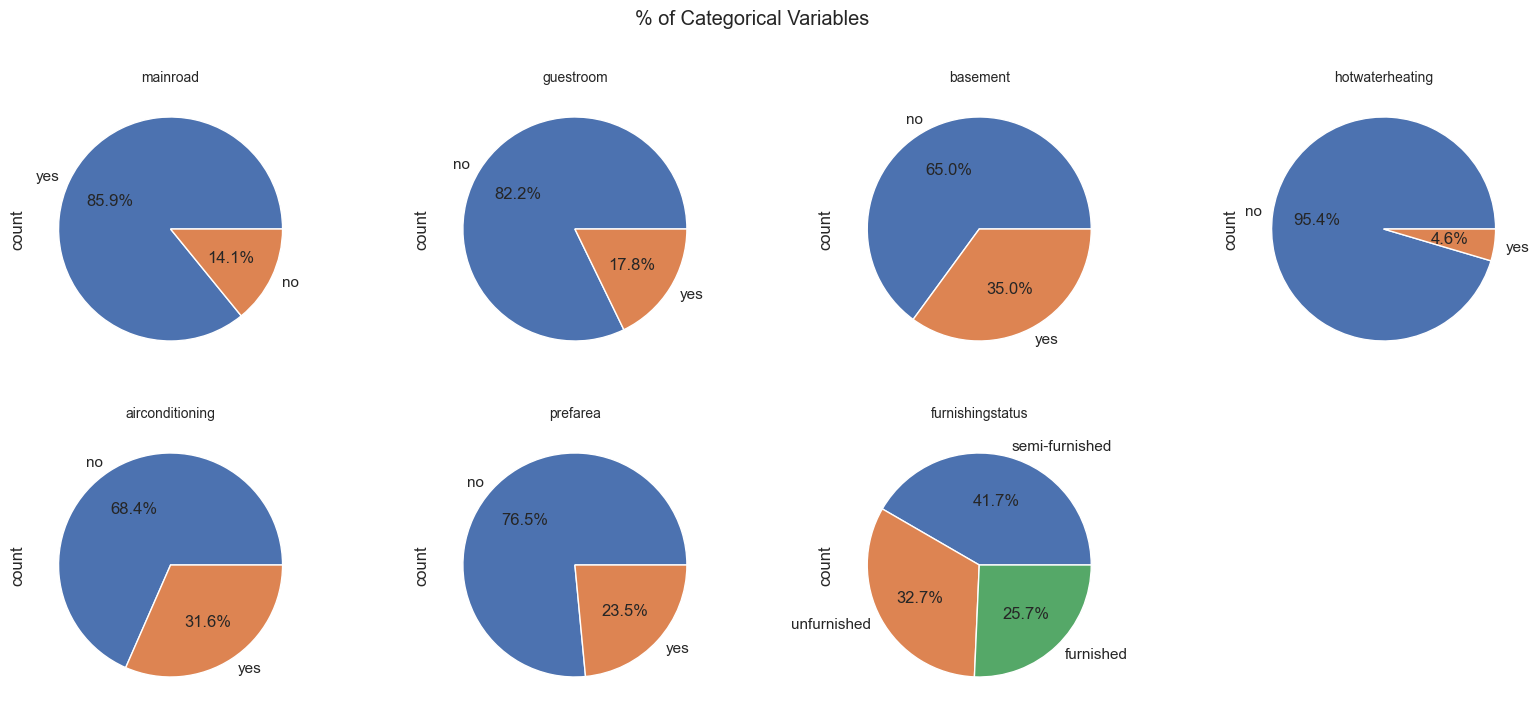

In [107]:
mroad_value = df.mainroad.value_counts()
guestroom_value = df.guestroom.value_counts()
basem_value = df.basement.value_counts()
hotwater_value = df.hotwaterheating.value_counts()
aricond_value = df.airconditioning.value_counts()
prefarea_value = df.prefarea.value_counts()
furn_value = df.furnishingstatus.value_counts()


fig = plt.figure(figsize=(20, 8)) # create a figure with a 20 width, 8 length

ax1 = plt.subplot(241)  # subplot with 2 rows, 4 columns, the 1st one
ax2 = plt.subplot(242)  # subplot with 2 rows, 4 columns, the 2nd one
ax3 = plt.subplot(243)  # subplot with 2 rows, 4 columns, the 3rd one
ax4 = plt.subplot(244)  # subplot with 2 rows, 4 columns, the 4th one
ax5 = plt.subplot(245)  # subplot with 2 rows, 4 columns, the 5th one
ax6 = plt.subplot(246)  # subplot with 2 rows, 4 columns, the 6th one
ax7 = plt.subplot(247)  # subplot with 2 rows, 4 columns, the 7th one


mroad_value.plot(kind='pie', x=mroad_value, y = mroad_value.index, autopct='%1.1f%%', ax= ax1)
guestroom_value.plot(kind='pie', x=guestroom_value, y = guestroom_value.index, autopct='%1.1f%%', ax= ax2)
basem_value.plot(kind='pie', x=basem_value, y = basem_value.index, autopct='%1.1f%%', ax= ax3)
hotwater_value.plot(kind='pie', x=hotwater_value, y = hotwater_value.index, autopct='%1.1f%%', ax= ax4)
aricond_value.plot(kind='pie', x=aricond_value, y = aricond_value.index, autopct='%1.1f%%', ax= ax5)
prefarea_value.plot(kind='pie', x=prefarea_value, y = prefarea_value.index, autopct='%1.1f%%', ax= ax6)
furn_value.plot(kind='pie', x=furn_value, y = furn_value.index, autopct='%1.1f%%', ax= ax7)

ax1.set_title('mainroad',  fontsize=10)
ax2.set_title('guestroom',  fontsize=10)
ax3.set_title('basement', fontsize=10)
ax4.set_title('hotwaterheating', fontsize=10)
ax5.set_title('airconditioning', fontsize=10)
ax6.set_title('prefarea', fontsize=10)
ax7.set_title('furnishingstatus', fontsize=10)
plt.suptitle('% of Categorical Variables')
plt.savefig("percentage of categorical variable")
plt.show()


The two primary probability distributions commonly used for categorical variables are the binomial and multinomial distributions. The binomial distribution is used in scenarios involving binary categorical variables, where only two potential outcomes, such as success or failure, exist. On the other hand, the multinomial distribution exhibits greater versatility and finds application in situations where categorical variables include more than two categories. This flexibility allows the multinomial distribution to model the probabilities associated with various outcomes within a single trial, making it well-suited for scenarios involving multiple categories[23].

The multinomial distribution key characteristics and properties:
- Fixed Number of Trials $n$;
- Probability Vector $P$ where each element in the vector represents the probability of one of the possible outcomes;
- Tals are independent of each other meaning that the outcome of one trial does not affect the outcomes of subsequent trials.

The result of the multinomial distribution provides a simulated random sample of occurrences for each category based on the specified probabilities. Each row in the resulting dataset corresponds to a category, and the "Observed" column represents the number of occurrences for each category in the simulated sample[24].


In [108]:
furnishing_counts = df['furnishingstatus'].value_counts()
furnishing_probabilities = (df['furnishingstatus'].value_counts() / len(df)).values

num_trials = 1000

# Calculate the probability for each furnishing status category
multinomial = np.random.multinomial(num_trials, furnishing_probabilities)

# Create a DataFrame to display the results
result_df = pd.DataFrame({'Furnishing Status': furnishing_counts.index, 'Observed': multinomial})

# Print the result
print(result_df)

  Furnishing Status  Observed
0    semi-furnished       424
1       unfurnished       325
2         furnished       251


let's now visualize the multinomial distribution of the categorical variables:

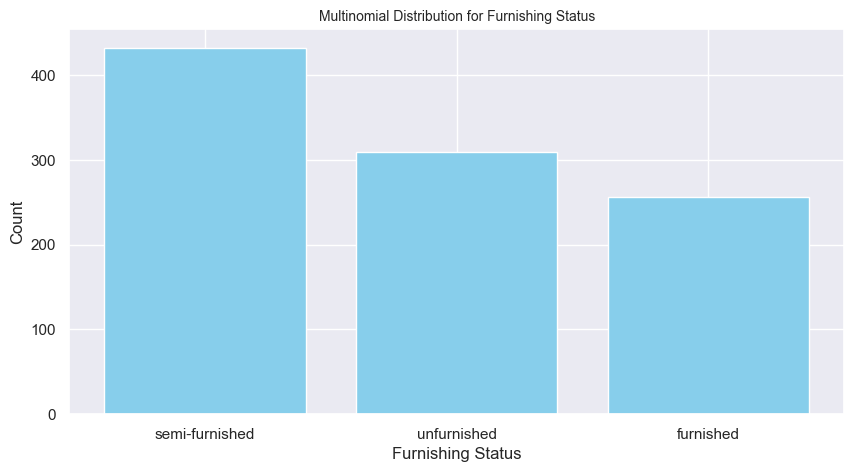

In [109]:
furnishing_categories = df['furnishingstatus'].value_counts()
furnishing_probabilities = (df['furnishingstatus'].value_counts() / len(df)).values

num_trials = 1000 

multinomial_samples = np.random.multinomial(num_trials, furnishing_probabilities)

# Create bar charts to visualize the multinomial distribution
plt.figure(figsize=(10, 5))

plt.bar(furnishing_categories.index, multinomial_samples, color='skyblue')
plt.title("Multinomial Distribution for Furnishing Status", fontsize=10)
plt.xlabel("Furnishing Status")
plt.ylabel("Count")
plt.savefig("Multinomial distribution for Categorical Variable")
plt.show()


Mainroad, guestroom, basement, hotwaterheating, airconditioning, prefarea provide an example where the binomial distribution is applicable. Much like the Multinomial distribution, the binomial distribution operates under the assumptions of a fixed number of trials or events, denoted as $n$, and the independence of each trial or event. Within this distribution, a probability $p$ indicates the likelihood of success, such as the probability of a property having a basement in the context of basement attribute. Consequently, the probability of failure is represented as $1−p$. The binomial distribution is primarily employed to model the count of successes, such as the count of basement in the house, within the specified number of trials[25].

In [110]:
cat_var = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
probabilities = {'mainroad': 0.85, 'guestroom': 0.82, 'basement': 0.35, 'hotwaterheating': 0.35, 'airconditioning': 0.04, 'prefarea': 0.23}
n = 1000  # Number of trials
success = 1  # Number of successes in each trial

# Create an empty dictionary to store probabilities for each category
result_probabilities = {}

# Loop through each category and calculate the probability of success
for category in cat_var:
    p = probabilities[category]
    # Generate random samples using the binomial distribution
    category_prob = sum(np.random.binomial(n=success, p=p, size=n) == 1) / n
    result_probabilities[category] = category_prob

# Print the probabilities for each category
for category, prob in result_probabilities.items():
    print(f'The probability to successfully choose {category} is {prob:.2%}')


#https://www.askpython.com/python/examples/print-a-percentage-value-in-python



The probability to successfully choose mainroad is 84.00%
The probability to successfully choose guestroom is 81.50%
The probability to successfully choose basement is 34.10%
The probability to successfully choose hotwaterheating is 35.80%
The probability to successfully choose airconditioning is 4.10%
The probability to successfully choose prefarea is 23.00%


let's viualize the Binomial Distribution:

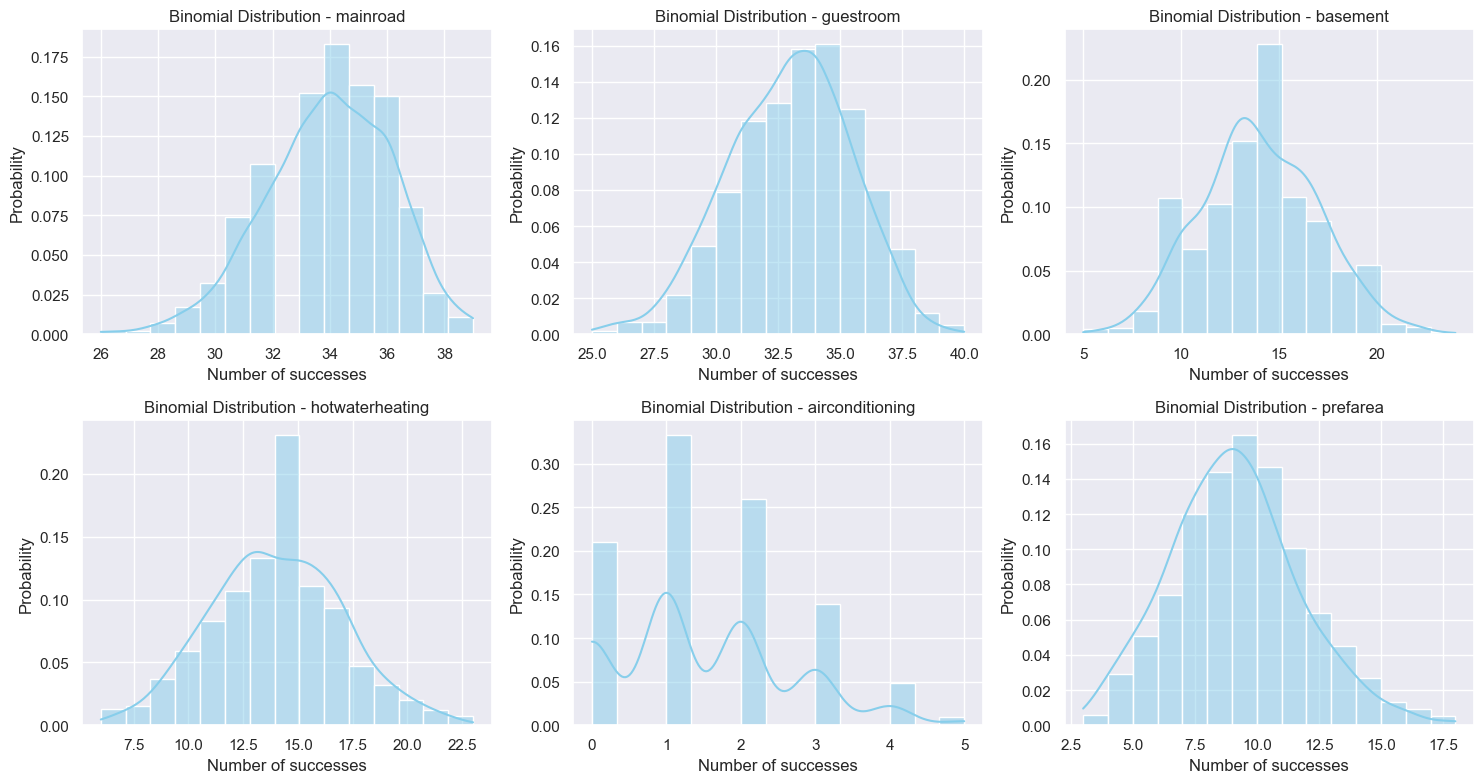

In [111]:
cat_var = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
probabilities = {'mainroad': 0.85, 'guestroom': 0.82, 'basement': 0.35, 'hotwaterheating': 0.35, 'airconditioning': 0.04, 'prefarea': 0.23}
n = 1000  # Number of trials
success = 40  # Number of successes in each trial

# Create a separate histogram for each category
plt.figure(figsize=(15, 8))

for i, category in enumerate(cat_var, 1):
    plt.subplot(2, 3, i)
    p = probabilities[category]
    # Generate random samples using the binomial distribution
    binomial_samples = np.random.binomial(n=success, p=p, size=n)
    # Create a histogram with KDE
    sns.histplot(x=binomial_samples, bins=15, stat='probability', kde=True, color='skyblue', edgecolor='white', alpha=0.5)
    plt.title(f'Binomial Distribution - {category}')
    plt.xlabel('Number of successes')
    plt.ylabel('Probability')

plt.tight_layout()
plt.savefig("Binomial distribution with KDE for Categorical Variables")
plt.show()


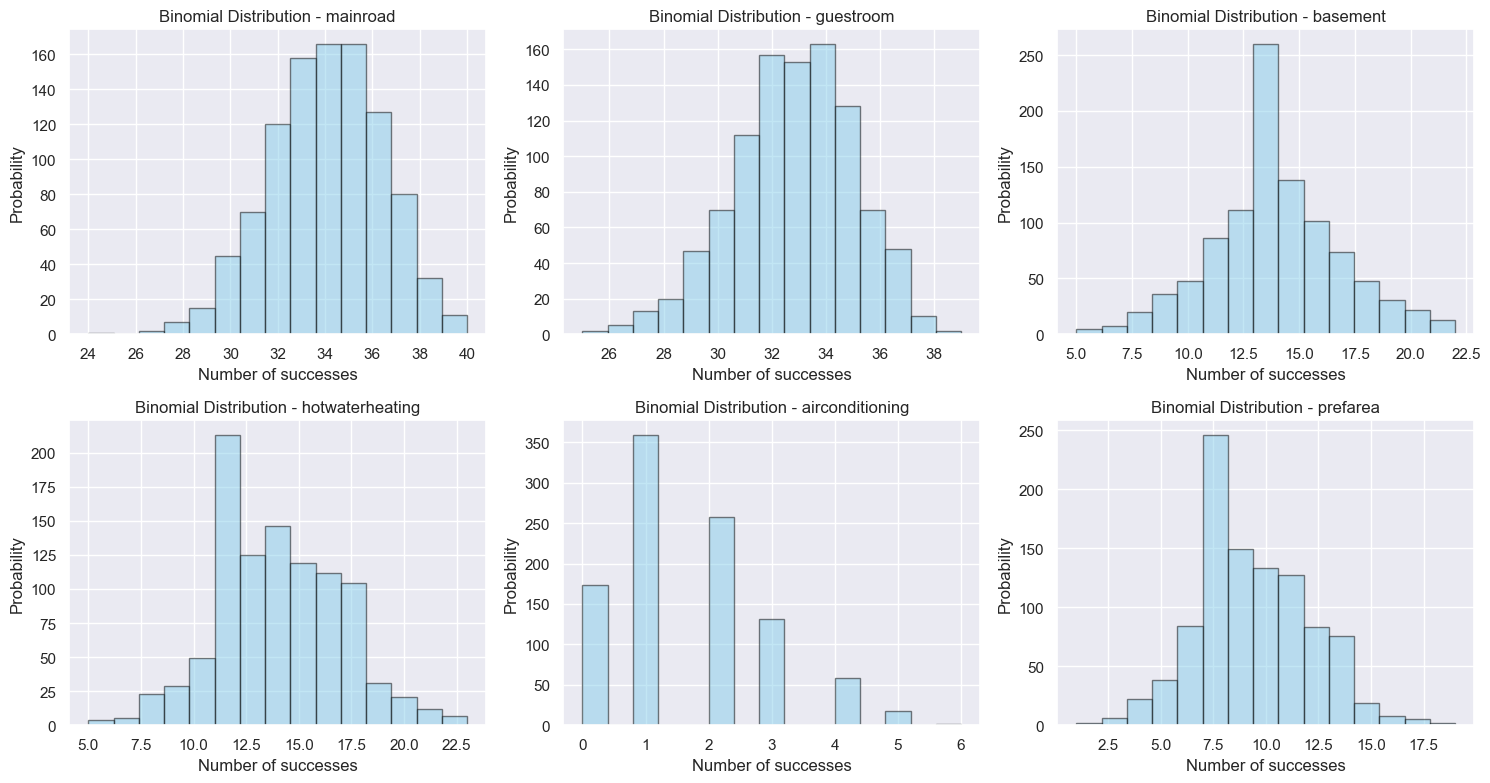

In [112]:
cat_var = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
probabilities = {'mainroad': 0.85, 'guestroom': 0.82, 'basement': 0.35, 'hotwaterheating': 0.35, 'airconditioning': 0.04, 'prefarea': 0.23}
n = 1000  # Number of trials
success = 40  # Number of successes in each trial

# Create a separate histogram for each category
plt.figure(figsize=(15, 8))

for i, category in enumerate(cat_var, 1):
    plt.subplot(2, 3, i)
    p = probabilities[category]
    # Generate random samples using the binomial distribution
    binomial_samples = np.random.binomial(n=success, p=p, size=n)
    # Create a histogram
    plt.hist(binomial_samples, bins=15, color='skyblue', edgecolor='black', alpha=0.5)
    plt.title(f'Binomial Distribution - {category}')
    plt.xlabel('Number of successes')
    plt.ylabel('Probability')

plt.tight_layout()
#plt.savefig("Binomial distribution for Categorical Variables")
plt.show()





#### Numerical Variables

For numerical variables, the `describe()` function is used to provide a comprehensive summary of key statistical measures. When applied to a numerical variable in a dataset, describe() furnishes the following information: Count (The number of non-null observations), Mean(The average value, indicating the central tendency of the), Standard Deviation (A measure of the dispersion or spread of the data), Minimum (The smallest observed value in the dataset), 25th/50th/75th Percentile (The value below which 25%/50%/75% of the data falls), Maximum (The largest observed value in the dataset)[26].

In [113]:
stat_info = df.describe()

print(f'The Statistical information of the Numerical variables are:')
stat_info

The Statistical information of the Numerical variables are:


,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


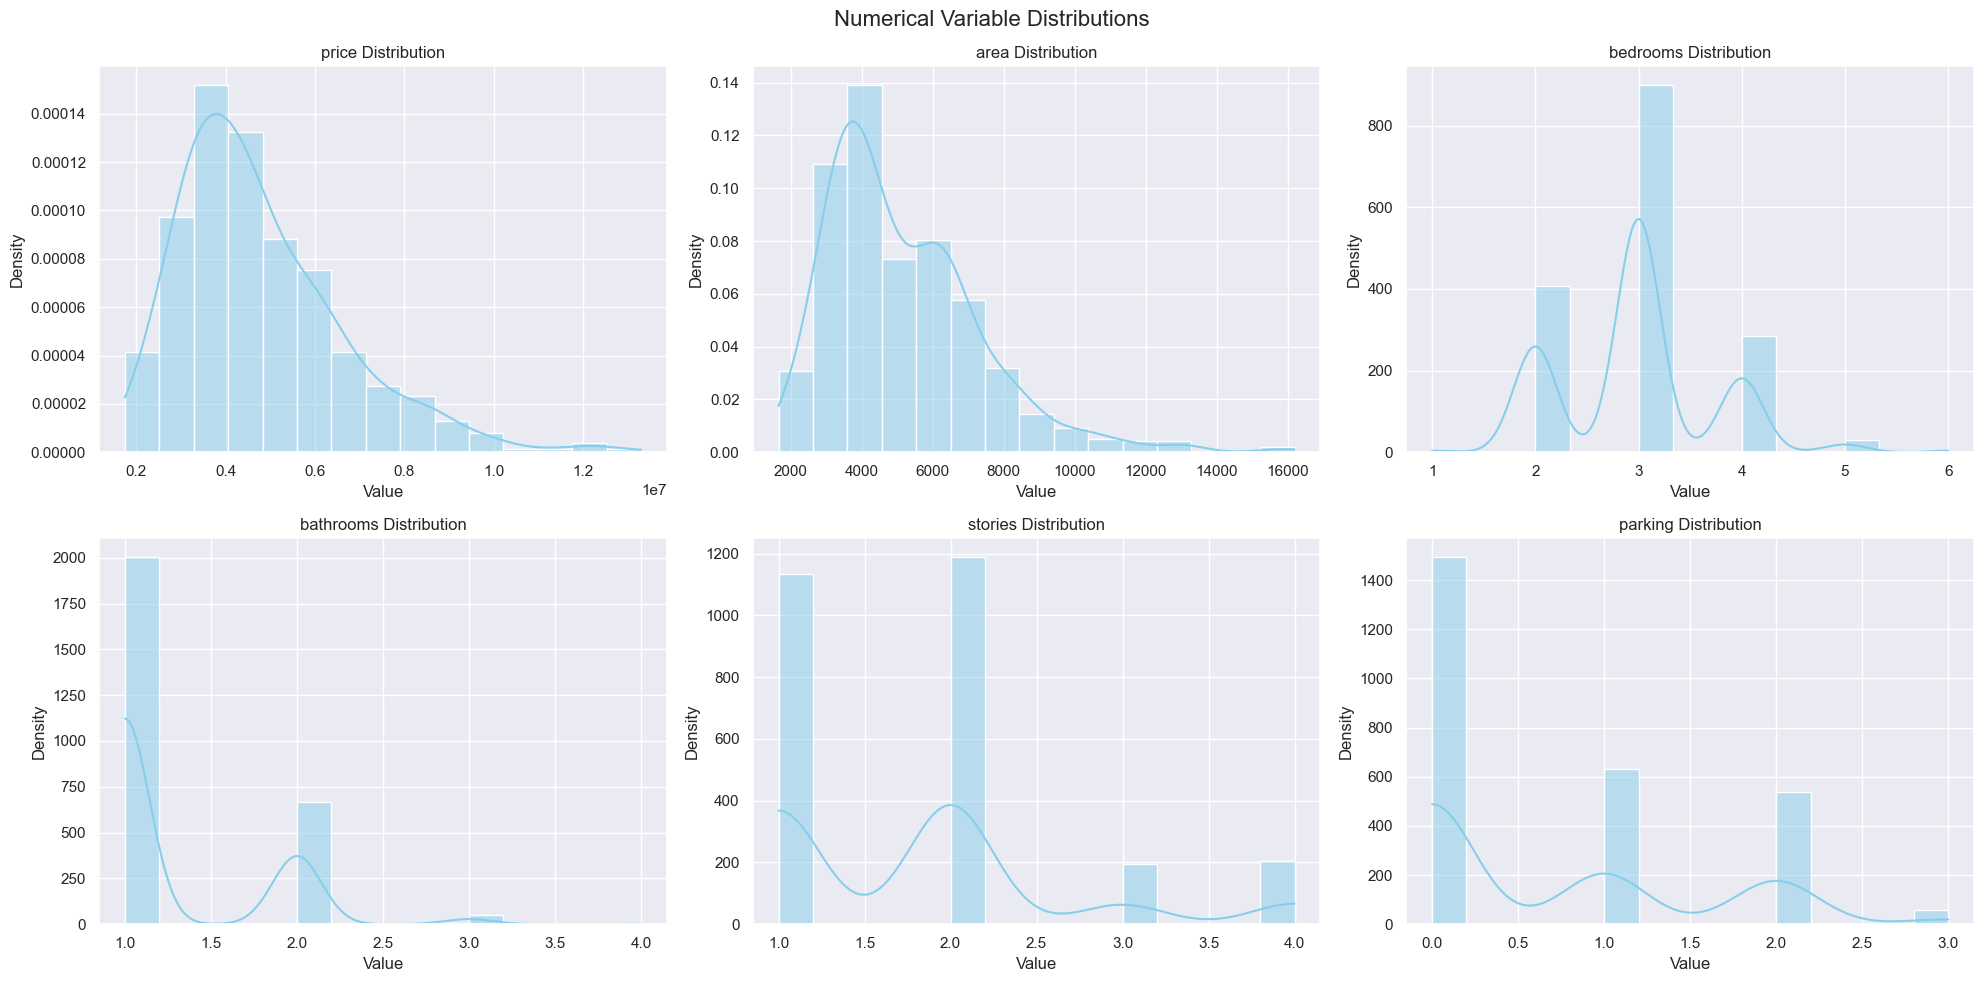

In [114]:
num_variables = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

fig, axes = plt.subplots(2, 3, figsize=(20, 10))
axes = axes.flatten()

for i in range(len(num_variables)):
    variable = num_variables[i]
    
    # Select data for the current variable
    data = df[variable]
    
    # Plotting KDE with histogram using Seaborn
    sns.histplot(x=data, bins=15, stat='frequency', kde=True, color='skyblue', edgecolor='white', ax=axes[i])
    sns.set(style="darkgrid")
    
    axes[i].set(xlabel='Value', ylabel='Density')
    axes[i].set_title(f'{variable} Distribution')

plt.suptitle("Numerical Variable Distributions", fontsize=16)
plt.tight_layout()
plt.show()


### References

[1]: Chugh v., (2023). "*Python pandas tutorial: The ultimate guide for beginners*".[Datacamp](https://www.datacamp.com/tutorial/pandas)

[2]: matplotlib, (n.d.). "*matplotlib.pyplot*". [matplotlib](https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html)

[3]: Zach, (2021). "*The Easiest Way to Use NumPy: import numpy as np*". [Statology](https://www.statology.org/import-numpy-as-np/#:~:text=The%20import%20numpy%20portion%20of,function_name%20rather%20than%20numpy.)

[4]:Scipy, (n.d.). "*Statistical functions (scipy.stats)*". [Scipy](https://docs.scipy.org/doc/scipy/reference/stats.html#module-scipy.stats)

[5]: Analyseup, (n.d.). "*Importing Data with Pandas*". [Analyseup](https://www.analyseup.com/learn-python-for-data-science/python-pandas-importing-data.html)

[6]: Shazra H., (2023). "*head () and tail () Functions Explained with Examples and Codes*". [Analytics Vidhya](https://www.analyticsvidhya.com/blog/2023/07/head-and-tail-functions/)

[7]: Pandas, (n.d.). "*pandas.DataFrame.shape*".[Pandas](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shape.html)

[8]: Rajan S., (2023). "*Python | Pandas dataframe.info()*". [geeksforgeeks](https://www.geeksforgeeks.org/python-pandas-dataframe-info/)

[9]: Moffitt C., (2018). "*Overview of Pandas Data Types*". [Practical Business Python](https://pbpython.com/pandas_dtypes.html#:~:text=An%20object%20is%20a%20string,df)

[10]: Welck Aj, (n.d.). "*How to Check If Any Value is NaN in a Pandas DataFrame*". [Chartio](https://chartio.com/resources/tutorials/how-to-check-if-any-value-is-nan-in-a-pandas-dataframe/)

[11]: Data to Fish, (2021). "*Select all Rows with NaN Values in Pandas DataFrame*". [Data to Fish](https://datatofish.com/rows-with-nan-pandas-dataframe/)

[12]: note.nkmk.me, (2021). "*pandas: Find and remove duplicate rows of DataFrame, Series*". [note.nkmk.me](https://note.nkmk.me/en/python-pandas-duplicated-drop-duplicates/#:~:text=You%20can%20count%20the%20number,counted%20with%20sum()%20method.&text=If%20you%20want%20to%20count,count%20True%20with%20sum()%20)

[14]:Shashank S., (2023). "*Defining, Analysing, and Implementing Imputation Techniques*". [Analytics Vidhya](https://www.analyticsvidhya.com/blog/2021/06/defining-analysing-and-implementing-imputation-techniques/)

[15]: Kirch, Wilhelm, ed. (2008). "*Level of Measurement*". Encyclopedia of Public Health. [Springer Link](https://link.springer.com/referenceworkentry/10.1007/978-1-4020-5614-7_1971)

[16]: DATAtab Team (2023). "*Level of measurement*". [DATAtab: Online Statistics Calculator](https://datatab.net/tutorial/level-of-measurement)

[17]: GraphPad, (n.d.). "*What is the difference between ordinal, interval and ratio variables? Why should I care?*". [GraphPad](https://www.graphpad.com/support/faq/what-is-the-difference-between-ordinal-interval-and-ratio-variables-why-should-i-care/)

[18]: Stevens S.S., (1946). "*On the Theory of Scales of Measurement*". Science, Volum. 103, No. 2684

[19]: Bhat A., (n.d.). "*Levels of Measurement: Nominal, Ordinal, Interval & Ratio*". [QuestionPro](https://www.questionpro.com/blog/nominal-ordinal-interval-ratio/)

[20]: Statgraphics19, (n.d.). "*Categorical Data Analysis*". [Statgraphics19](https://www.statgraphics.com/categorical-data-analysis#:~:text=The%20Frequency%20Tables%20procedure%20analyzes,a%20set%20of%20multinomial%20probabilities.)

[21]: Ebner J., (2020). "*How to Use Pandas Unique to Get Unique Values*". [Sharp Sight](https://www.sharpsightlabs.com/blog/pandas-unique/)


[23]: Zach, (2021). "*What is a Categorical Distribution?*". [Statology](https://www.statology.org/categorical-distribution/)

[24]: Statistics How to, (n.d.). "*Multinomial Distribution: Definition, Examples*". [Statistics How to](https://www.statisticshowto.com/multinomial-distribution/)

[25]: CueMath, (n.d.). "*Binomial Distribution*". [CueMath](https://www.cuemath.com/algebra/binomial-distribution/)

[26]: W3 School, (n.d.). "*Pandas DataFrame describe() Method*". [W3 School](https://www.w3schools.com/python/pandas/ref_df_describe.asp#:~:text=The%20describe()%20method%20returns,std%20%2D%20The%20standard%20deviation)

### Additional readings

- Stackoverflow, (2020). "*Python how to fix year out of range error*".[stackoverflow](https://stackoverflow.com/questions/62130640/python-how-to-fix-year-out-of-range-error)
- Stackoverflow, (2017). "*Understanding inplace=True in pandas*". [Stackoverflow](https://stackoverflow.com/questions/43893457/understanding-inplace-true-in-pandas)
- matplotlib, (n.d.). "*matplotlib.pyplot.pie*". [matplotlib](https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.pie.html)
- Amipara K., (2017). "*Better visualization of Pie charts by MatPlotLib*".[Medium](https://medium.com/@kvnamipara/a-better-visualisation-of-pie-charts-by-matplotlib-935b7667d77f)
- Stackoverflow, (2020). "*How to plot 3 plots simultaneously in one plot?*". [Stackoverflow](https://stackoverflow.com/questions/61547691/how-to-plot-3-plots-simultaneously-in-one-plot)
- Numpy (n.d.). "*numpy.random.multinomial*". [Numpy](https://numpy.org/doc/stable/reference/random/generated/numpy.random.multinomial.html)
- Numpy (n.d.). "*numpy.random.binomial*". [Numpy](https://numpy.org/doc/stable/reference/random/generated/numpy.random.binomial.html)
- parasmadan15, (n.d.). "*Display the Pandas DataFrame in table style*". [Geeks for Geeks](https://www.geeksforgeeks.org/display-the-pandas-dataframe-in-table-style/)
- Stack Overflow, (2011). "*How to put the legend outside the plot*".[Stack Overflow](https://stackoverflow.com/questions/4700614/how-to-put-the-legend-outside-the-plot)
- Kartikaybhutani, (n.d.)"*Python | Pandas DataFrame.isin()*". [Geeks for Geeks](https://www.geeksforgeeks.org/python-pandas-dataframe-isin/)
- Solomon B., (2022). "*pandas GroupBy: Your Guide to Grouping Data in Python*". [Real Python](https://realpython.com/pandas-groupby/)
- Mishra S., (2021). "*Resample function of Pandas*". [towardsdatascience](https://towardsdatascience.com/resample-function-of-pandas-79b17ec82a78)

***
End